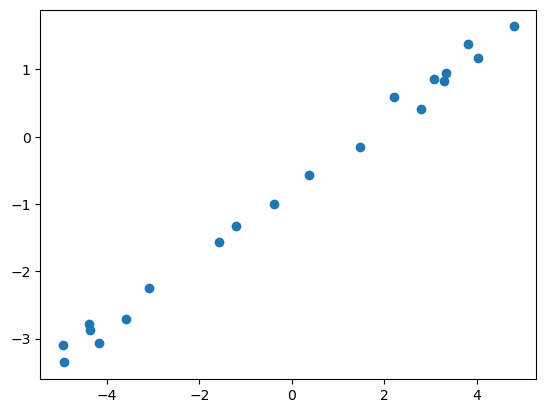

In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Generate 20 data points
N = 20
# Random data on x-axis
X = np.random.rand(N) * 10 - 5
Y = 0.5 * X - 1 + 0.5*np.random.rand(N)


plt.scatter(X,Y)

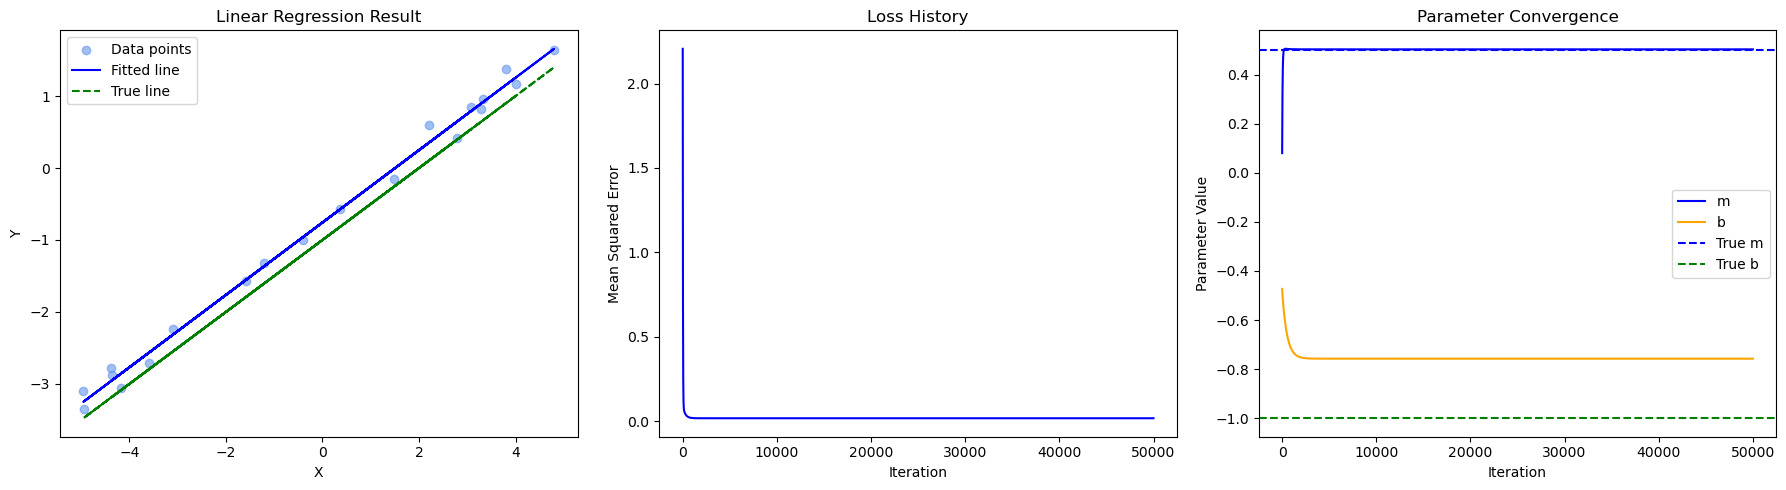

Estimated m: 0.5030297636985779
Estimated b: -0.7572893500328064


In [3]:

# Convert data to PyTorch tensors
X_train = torch.tensor(X, dtype=torch.float32).view(-1, 1)
Y_train = torch.tensor(Y, dtype=torch.float32).view(-1, 1)

# Define the model class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        # Initialize m and b as parameters with random values
        self.m = nn.Parameter(torch.randn(1, dtype=torch.float32))
        self.b = nn.Parameter(torch.randn(1, dtype=torch.float32))

    def forward(self, x):
        # Apply the linear transformation y = mx + b
        return self.m * x + self.b
    
    
# Initialize model and optimizer
model = LinearRegressionModel()
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Training loop with data recording for plots
epochs = 50000
loss_history = []
m_values, b_values = [], []

for epoch in range(epochs):
    # Forward pass
    y_pred = model(X_train)
    
    # Calculate Mean Squared Error (MSE) Loss
    loss = torch.mean((y_pred - Y_train) ** 2)
    loss_history.append(loss.item())
    m_values.append(model.m.item())
    b_values.append(model.b.item())
    
    # Backward pass and parameter update
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Linear Regression Result Plot
axs[0].scatter(X, Y, color="cornflowerblue", alpha=0.6, label="Data points")
axs[0].plot(X, model.m.item() * X + model.b.item(), color="blue", label="Fitted line")
axs[0].plot(X, 0.5 * X - 1, 'g--', label="True line")
axs[0].set_title("Linear Regression Result")
axs[0].set_xlabel("X")
axs[0].set_ylabel("Y")
axs[0].legend()

# Loss History Plot
axs[1].plot(range(epochs), loss_history, color="blue")
axs[1].set_title("Loss History")
axs[1].set_xlabel("Iteration")
axs[1].set_ylabel("Mean Squared Error")

# Parameter Convergence Plot
axs[2].plot(range(epochs), m_values, label="m", color="blue")
axs[2].plot(range(epochs), b_values, label="b", color="orange")
axs[2].axhline(y=0.5, color="blue", linestyle="--", label="True m")
axs[2].axhline(y=-1, color="green", linestyle="--", label="True b")
axs[2].set_title("Parameter Convergence")
axs[2].set_xlabel("Iteration")
axs[2].set_ylabel("Parameter Value")
axs[2].legend()

plt.tight_layout()
plt.show()

print("Estimated m:", model.m.item())
print("Estimated b:", model.b.item())
